In [2]:
#Task 7.1 
#Combine year 2019 and year 2020’s crime records into one pandas dataframe.
#import the required module
import pandas as pd
import glob
import os
#locate the two records
file1 = "C:/Users/27737/BOS Crime_2019.csv"
file2 = "C:/Users/27737/BOS Crime_2020.csv"
combinecrime_df = pd.concat(
   map(pd.read_csv, [file1, file2]), ignore_index=True)
print(combinecrime_df)
#Drop duplicates as well as any record that has missing values in the following columns: 
#“INCIDENT_NUMBER”, “OFFENSE_CODE”, “DISTRICT”, “Long”, “Lat”, “SHOOTING”, “OCCURRED_ON_DATE”. 
print('before:', combinecrime_df.shape)
cleaned_combinecrime_df = combinecrime_df.dropna(subset=['INCIDENT_NUMBER', 'OFFENSE_CODE','DISTRICT','Long','Lat','SHOOTING','OCCURRED_ON_DATE'])
print('after:', cleaned_combinecrime_df.shape)
#Save the “cleaned” pandas dataframe to a separate csv file
cleaned_combinecrime_df.to_csv(r"C:/Users/27737/ccombined_BOSCrime_dataof19-20.csv", encoding='utf-8', index=False)
#Use the "OFFENSE_DESCRIPTION" column to identify violent vs. property crime incidents
cleaned_combinecrime_df['offense_type'] = None
cleaned_combinecrime_df['offense_type'][cleaned_combinecrime_df['OFFENSE_DESCRIPTION'].str.lower().str.contains('robbery|assault|rape')] = 'violent crime'
cleaned_combinecrime_df['offense_type'][cleaned_combinecrime_df['OFFENSE_DESCRIPTION'].str.lower().str.contains('burglary|larceny|theft|auto theft|arson')] = 'property crime'
#Count the total number of violent vs. property crime incidents in Boston in year 2019 and year 2020 respectively and print the results.
describe_by_offense = cleaned_combinecrime_df.groupby(['offense_type', 'YEAR']).agg({'INCIDENT_NUMBER': 'count'}).reset_index()
describe_by_offense

C:\Users\27737\AppData\Local\Temp\ipykernel_20824\989091762.py:10: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  combinecrime_df = pd.concat(
C:\Users\27737\AppData\Local\Temp\ipykernel_20824\989091762.py:10: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  combinecrime_df = pd.concat(


       INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
0            102091671          2647                 NaN   
1            102095489          3115                 NaN   
2            102096818          2905                 NaN   
3            129092894          3201                 NaN   
4            129099920          3301                 NaN   
...                ...           ...                 ...   
158073        20063425          3114                 NaN   
158074        20062356          1107                 NaN   
158075        20046400          1501                 NaN   
158076        20038446          1501                 NaN   
158077        20030892           540                 NaN   

                                      OFFENSE_DESCRIPTION DISTRICT  \
0                               THREATS TO DO BODILY HARM       B3   
1                                      INVESTIGATE PERSON      E18   
2                             VAL - VIOLATION OF AUTO LAW       A1   

C:\Users\27737\AppData\Local\Temp\ipykernel_20824\989091762.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_combinecrime_df['offense_type'] = None
C:\Users\27737\AppData\Local\Temp\ipykernel_20824\989091762.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_combinecrime_df['offense_type'][cleaned_combinecrime_df['OFFENSE_DESCRIPTION'].str.lower().str.contains('robbery|assault|rape')] = 'violent crime'
C:\Users\27737\AppData\Local\Temp\ipykernel_20824\989091762.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

,offense_type,YEAR,INCIDENT_NUMBER
0,property crime,2019,13158
1,property crime,2020,12227
2,violent crime,2019,8324
3,violent crime,2020,5152


Compared with data in 2019, both the number of property crime and violent crime declines. However, the proportion of declines differs, violent crime's reduction scale is larger than property crime.

   DISTRICT offense_type_x  YEAR_x  violent_crimes  offense_type_y  YEAR_y  \
0        A1  violent crime    2019            1216  property crime    2019   
1       A15  violent crime    2019             153  property crime    2019   
2        A7  violent crime    2019             333  property crime    2019   
3        B2  violent crime    2019            1286  property crime    2019   
4        B3  violent crime    2019            1081  property crime    2019   
5       C11  violent crime    2019            1026  property crime    2019   
6        C6  violent crime    2019             621  property crime    2019   
7       D14  violent crime    2019             420  property crime    2019   
8        D4  violent crime    2019            1146  property crime    2019   
9       E13  violent crime    2019             432  property crime    2019   
10      E18  violent crime    2019             352  property crime    2019   
11       E5  violent crime    2019             254  property cri

<AxesSubplot:xlabel='property_crimes', ylabel='violent_crimes'>

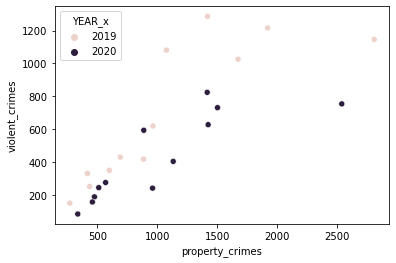

In [3]:
#Task 7.2 
#import required module
import seaborn as sns
import plotly.express as px
#Create a scatterplot of annual violent crimes vs. annual property crimes by district in Boston from 2019 to 2020.
#X axis: annual property crimes. Y axis: annual violent crimes. Use different colors to color data from different years.
#Select required data
cleaned_combinecrime_df = cleaned_combinecrime_df[cleaned_combinecrime_df.DISTRICT != 'External']
describe_by_district = cleaned_combinecrime_df.groupby(['DISTRICT','offense_type','YEAR']).agg({'INCIDENT_NUMBER': 'count'}).reset_index()
describe_by_district
#create new dataframe
annual_violent_crimes = describe_by_district[describe_by_district['offense_type'] == 'violent crime']
annual_property_crimes = describe_by_district[describe_by_district['offense_type'] == 'property crime']
#distinct by years and reorganize the data
violentcrime19_df= annual_violent_crimes[annual_violent_crimes['YEAR']==2019]
violentcrime20_df= annual_violent_crimes[annual_violent_crimes['YEAR']==2020]
propertycrime19_df= annual_property_crimes[annual_property_crimes['YEAR']==2019]
propertycrime20_df= annual_property_crimes[annual_property_crimes['YEAR']==2020]

violentcrime19_df= violentcrime19_df.rename(columns={'INCIDENT_NUMBER':'violent_crimes'})
violentcrime20_df= violentcrime20_df.rename(columns={'INCIDENT_NUMBER':'violent_crimes'})
propertycrime19_df= propertycrime19_df.rename(columns={'INCIDENT_NUMBER':'property_crimes'})
propertycrime20_df= propertycrime20_df.rename(columns={'INCIDENT_NUMBER':'property_crimes'})

total19_df=violentcrime19_df.merge(propertycrime19_df, how='left', left_on='DISTRICT', right_on='DISTRICT')
total20_df=violentcrime20_df.merge(propertycrime20_df, how='left', left_on='DISTRICT', right_on='DISTRICT')

total19_20_df=pd.concat([total19_df, total20_df])
print(total19_20_df)
#print the scatterplot
sns.scatterplot(x='property_crimes', y='violent_crimes', data=total19_20_df, hue='YEAR_x')


<AxesSubplot:xlabel='DISTRICT', ylabel='aunnual_sum'>

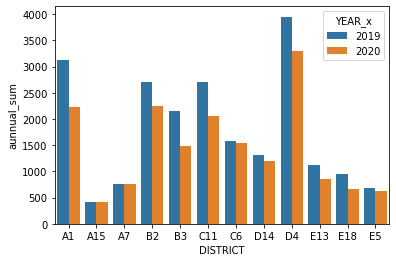

In [4]:
#Task 7.3 
#Create a bar plot of the sum of annual violent and property crimes by district in Boston from 2019 to 2020. 
#X axis: districts. Y axis: annual sums. Use different bars to represent data from different years. 
#combine the data
total19_20_df['aunnual_sum'] = total19_20_df['property_crimes'] + total19_20_df['violent_crimes']
#print the barplot
sns.barplot(x='DISTRICT', y='aunnual_sum', data=total19_20_df, hue='YEAR_x')


C:\Users\27737\AppData\Local\Temp\ipykernel_19044\4238458841.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<AxesSubplot:xlabel='QUARTER', ylabel='INCIDENT_NUMBER'>

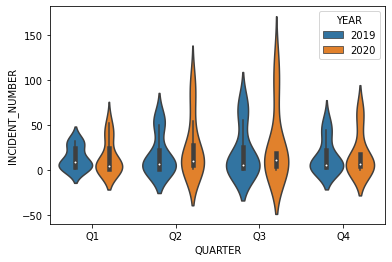

In [135]:
#Task 7.4 
#Create a violin plot of district-level shooting incidents by quarter in Boston from 2019 to 2020. 
#X axis: quarters. Y axis: district-level shooting incidents (counts).
def categorise(row):  
    if row['MONTH'] > 0 and row['MONTH'] <= 3:
        return 'Q1'
    elif row['MONTH'] > 3 and row['MONTH'] <= 6:
        return 'Q2'
    elif row['MONTH'] > 6 and row['MONTH'] <= 9:
        return 'Q3'
    elif row['MONTH'] > 9 and row['MONTH'] <= 12:
        return 'Q4'
cleaned_combinecrime_df['QUARTER'] = cleaned_combinecrime_df.apply(lambda row: categorise(row), axis=1)
shoot_incidents = cleaned_combinecrime_df.loc[cleaned_combinecrime_df['SHOOTING'] == 1]
shooting_by_quarters = shoot_incidents.groupby(['DISTRICT','QUARTER','YEAR']).agg({'INCIDENT_NUMBER': 'count'}).reset_index()
shooting_by_quarters
sns.violinplot(y='INCIDENT_NUMBER', x='QUARTER', data=shooting_by_quarters,hue = 'YEAR')